In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
h = 1e-3
n = 1000

# TUTORIAL 4: Surfaces


## Weingarten endomorphism, principal curvatures and principal directions. 
Let $f:U\subset \mathbb{R}^2 \to \mathbb{R}^3$ be a regular parameterized surface of class $C^2$. We recall that at the point $m_0=f(x_0,y_0)$, the two vectors $\mathcal{B}_{m_0}:=(\frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0))$ form a basis of the tangent space. 

$\bullet$ The matrix of the first fundamental form in the basis $\mathcal{B}_{m_0}$ is given by
$$
I_{m_0}=\left(\begin{array}{cc}
E_{m_0}&F_{m_0}\\
F_{m_0}&G_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad E_{m_0}=\left\| \frac{\partial f}{\partial x}(x_0,y_0)\right\|^2\quad
F_{m_0}=\langle \frac{\partial f}{\partial x}(x_0,y_0),\frac{\partial f}{\partial y}(x_0,y_0)\rangle\quad
G_{m_0}=\left\| \frac{\partial f}{\partial y}(x_0,y_0)\right\|^2
$$

$\bullet$ The matrix of the second fundamental form is given by
$$
II_{m_0}=\left(\begin{array}{cc}
L_{m_0}&M_{m_0}\\
M_{m_0}&N_{m_0}\\
\end{array}
\right)
$$
with
$$
\quad L_{m_0}=\langle \frac{\partial^2 f}{\partial x^2}(x_0,y_0),K(x_0,y_0)\rangle\quad
M_{m_0}=\langle \frac{\partial^2 f}{\partial x\partial y}(x_0,y_0),K(x_0,y_0)\rangle\quad
N_{m_0}=\langle \frac{\partial^2 f}{\partial y^2}(x_0,y_0),K(x_0,y_0)\rangle\quad
$$
where $K(x_0,y_0)=\frac{\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)}{\|\frac{\partial f}{\partial x}(x_0,y_0)\wedge\frac{\partial f}{\partial y}(x_0,y_0)\|}$.

$\bullet$ The matrix of the Weingarten endomorphism at $m_0$ in the basis $\mathcal{B}_{m_0}$ is given by 
$$
A_{m_0}= I_{m_0}^{-1} II_{m_0}
$$
The eigenvalues $\lambda_1$ and $\lambda_2$ of $A_{m_0}$ are called the principal curvatures.

The eigenvectors $\vec{e_1}$ and $\vec{e_2}$ of $A_{m_0}$ are called the principal directions.


# PART 1. Numerical computation of principal directions
We want to compute a function that numerically compute the principal vectors and principal directions of a paramatrized surface $f:U\to \mathbb{R}^2$ at a point $f(x_0,y_0)$. Namely, we want to define a function whose signature can for instance be 
$$
\textbf{def principal}(f, x_0, y_0, h=0.001):
$$

In [2]:
def f(x, y):
    return np.array([x**2, y**2, x*y])

In [3]:
def derivative(f, x0, y0, h):
    fp_x = (f(x0+h,y0)-f(x0-h,y0))/2/h
    fp_y = (f(x0,y0+h)-f(x0,y0-h))/2/h
    return fp_x, fp_y

def derivative2(f, x0, y0, h):
    fpp_x = (f(x0+h, y0) -2*f(x0,y0) + f(x0-h,y0))/h/h
    fpp_y = (f(x0, y0+h) -2*f(x0,y0) + f(x0,y0-h))/h/h
    # (fp_x(x0, y0+h) - fp_x(x0, y0-h))/2/h
    fpp_xy = ((f(x0+h,y0+h)-f(x0-h,y0+h))/2/h - (f(x0+h,y0-h)-f(x0-h,y0-h))/2/h)/2/h 
    return fpp_x, fpp_y, fpp_xy

def principal(f, x0, y0, h=1e-3):
    fp_x, fp_y = derivative(f, x0, y0, h)
    E_m0 = np.dot(fp_x, fp_x)
    G_m0 = np.dot(fp_y, fp_y)
    F_m0 = np.dot(fp_x, fp_y)
    return np.array([[E_m0, F_m0], [F_m0, G_m0]])

def second_fundamental(f, x0, y0, h=1e-3):
    fp_x, fp_y = derivative(f, x0, y0, h)
    fpp_x, fpp_y, fpp_xy = derivative2(f, x0, y0, h)
    cross = np.cross(fp_x, fp_y)
    K = cross / np.linalg.norm(cross)
    L_m0 = np.dot(fpp_x, K)
    M_m0 = np.dot(fpp_xy, K)
    N_m0 = np.dot(fpp_y, K)
    return np.array([[L_m0, M_m0], [M_m0, N_m0]])

def Weingarten(f, x0, y0, h=1e-3):
    I_m0 = principal(f, x0, y0, h)
    II_m0 = second_fundamental(f, x0, y0, h)
    return np.linalg.inv(I_m0) @ II_m0

def eigs(f, x0, y0, h=1e-3):
    A_m0 = Weingarten(f, x0, y0, h)
    return np.linalg.eig(A_m0)

In [4]:
derivative2(f, 5, 3, h)

(array([2., 0., 0.]), array([0., 2., 0.]), array([0., 0., 1.]))

In [5]:
derivative(f, 5, 3, h)

(array([10.,  0.,  3.]), array([0., 6., 5.]))

  # PART 2. Application to different surfaces
  ## 1) PRINCIPAL DIRECTIONS OF THE CONE
 Below we give a parametrization of a cone of apex $(0,0,0)$ and vertical axis $(0z)$ and plot it


In [6]:
def plot(u_b, v_b, f, get_mean=False):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    u = np.linspace(u_b[0], u_b[1], n)
    v = np.linspace(v_b[0], v_b[1], n)
    u,v = np.meshgrid(u,v)

    x, y, z = f(u,v)
    u = np.linspace(u_b[0], u_b[1], n)
    v = np.linspace(v_b[0], v_b[1], n)

    # plot of the survface
    ax.plot_surface(x,y,z)
    ax.contour(x,y,z)
    plt.show()

    # plot of surface with tangent lines
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    u = np.linspace(u_b[0], u_b[1], n)
    v = np.linspace(v_b[0], v_b[1], n)
    u,v = np.meshgrid(u,v)

    x, y, z = f(u,v)
    u = np.linspace(u_b[0], u_b[1], n)
    v = np.linspace(v_b[0], v_b[1], n)
    #if get_mean: ax.plot_surface(x,y,z)
    ax.contour(x,y,z,colors='black')

    for i, (x0,y0) in enumerate(zip(u[100::200],v[100::200])):
        # calc m0, λ, etc
        m0 = f(x0, y0)
        λ, e = eigs(f, x0, y0, h)
        e = e.T
        # e is coefficients of (σf/σx, σf/σy) basis
        fp_x, fp_y = derivative(f, x0, y0, h)
        e1 = e[0,0]*fp_x + e[0,1]*fp_y
        e1 *= λ[0]
        e2 = e[1,0]*fp_x + e[1,1]*fp_y
        e2 *= λ[1]
        ax.plot(
            xs=[m0[0]-e1[0], m0[0]+e1[0]],
            ys=[m0[1]-e1[1], m0[1]+e1[1]],
            zs=[m0[2]-e1[2], m0[2]+e1[2]],
            label='C1', color='green'
        )
        ax.plot(
            xs=[m0[0]-e2[0], m0[0]+e2[0]],
            ys=[m0[1]-e2[1], m0[1]+e2[1]],
            zs=[m0[2]-e2[2], m0[2]+e2[2]],
            label='C1', color='red'
        )
    if get_mean:
        GaussianCurvature = []
        for i, (x0,y0) in enumerate(zip(u,v)):
            # calc m0, λ, etc
            m0 = f(x0, y0)
            λ, e = eigs(f, x0, y0, h)

            GaussianCurvature.append((λ[0]+λ[1])/2)
        return np.mean(GaussianCurvature)

### At some points  $m_0=f(x_0,y_0)$:
### - Calculate the principal curvatures $\lambda_1$ and $\lambda_2$ and principal directions $\vec{e_1}$ and $\vec{e_2}$.
### -  Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$ 
### -  What do you observe ?

In [7]:
def f(u, v):
    return np.array([v*np.cos(u), v*np.sin(u), v])

<IPython.core.display.Javascript object>


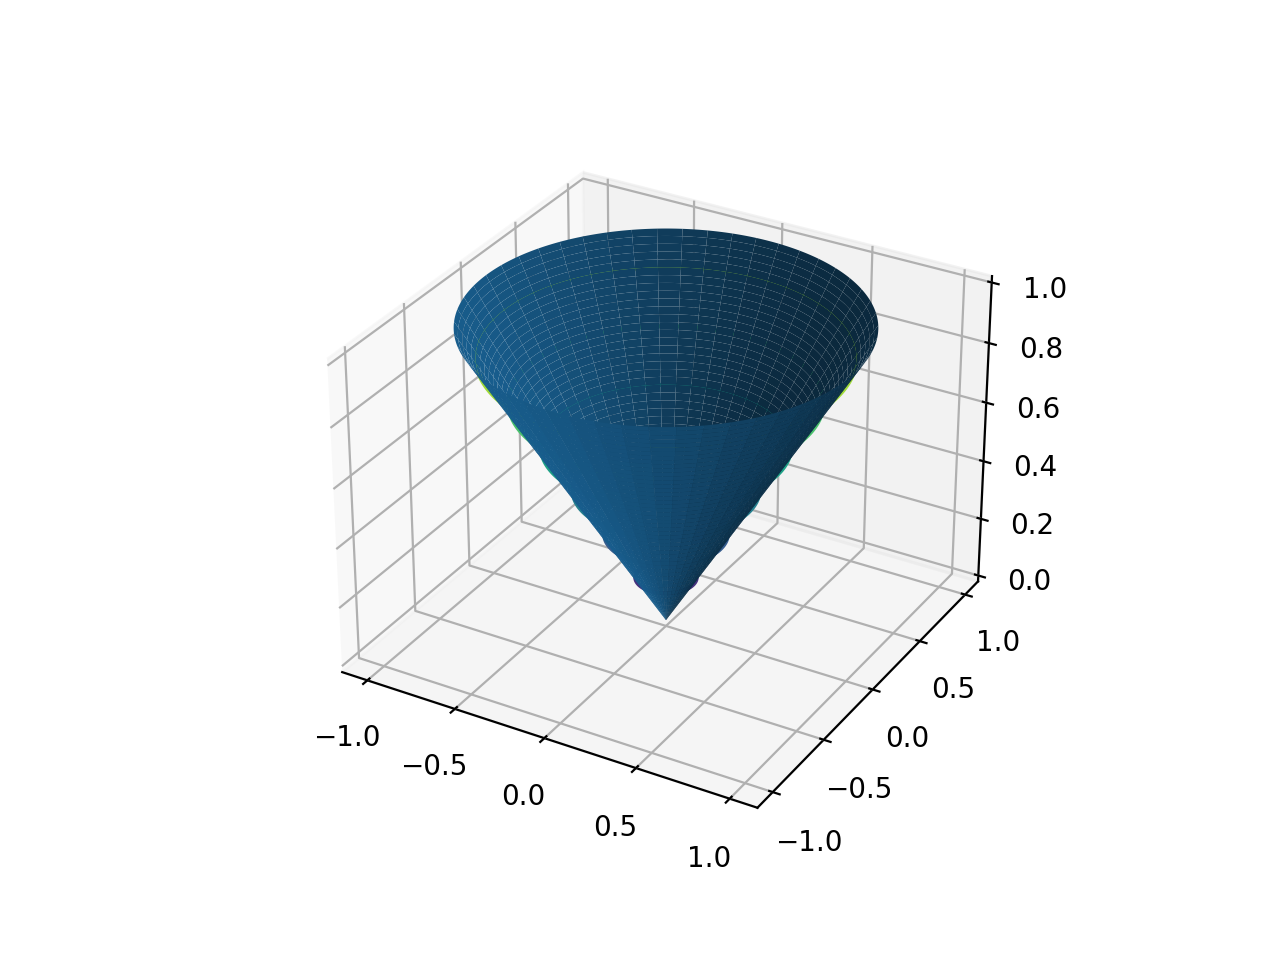

<IPython.core.display.Javascript object>


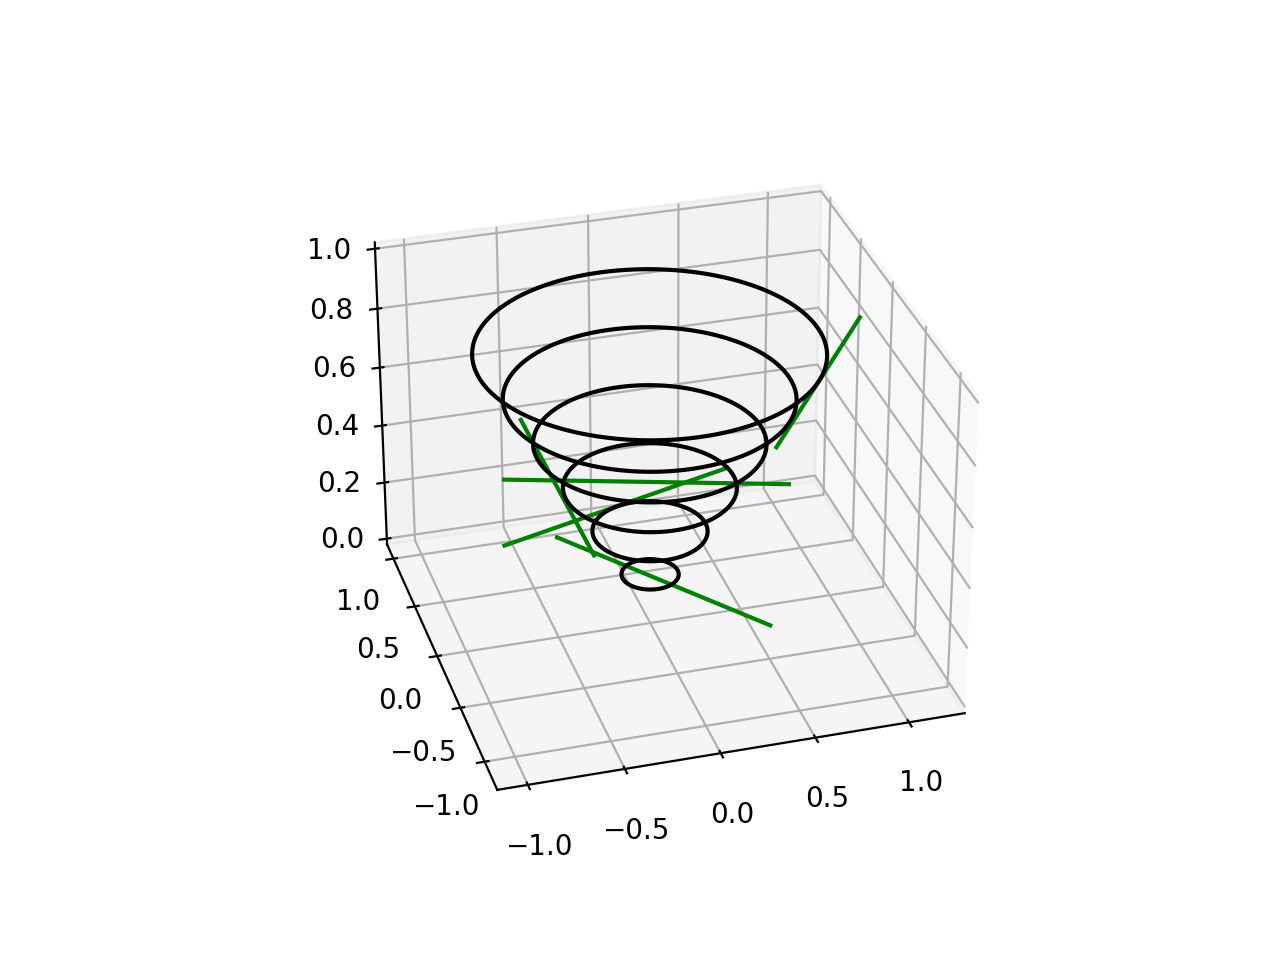

In [8]:
%matplotlib notebook
plot([0, 2*np.pi], [0,1.], f)

   ## 2) PRINCIPAL DIRECTIONS OF THE HYPERBOLOIDE OF REVOLUTION
 The hyperboloid of revolution is parametrized by
 $$
 \begin{array}{rlll}
 f:&[0,2\pi]\times [-H,H] &\to &\mathbb{R}^3\\
 &(u,v)&\mapsto & (\cos u, \sin u,0)+ v (-\sin u,\cos u,1)\\
 \end{array}
 $$
### At some points  $m_0=f(x_0,y_0)$:
### -  Plot the segments $C_1 = \{m_0 + t \vec{e_1},\ t\in[-\lambda_1,\lambda_1]\}$ and $C_2 = \{m_0 + t \vec{e_2},\ t\in[-\lambda_2,\lambda_2]\}$ 
### -  What do you observe ?

In [9]:
def f(u, v):
    return np.array([np.cos(u), np.sin(u), np.zeros_like(u)]) + \
            v*np.array([-np.sin(u), np.cos(u), np.ones_like(u)])

<IPython.core.display.Javascript object>


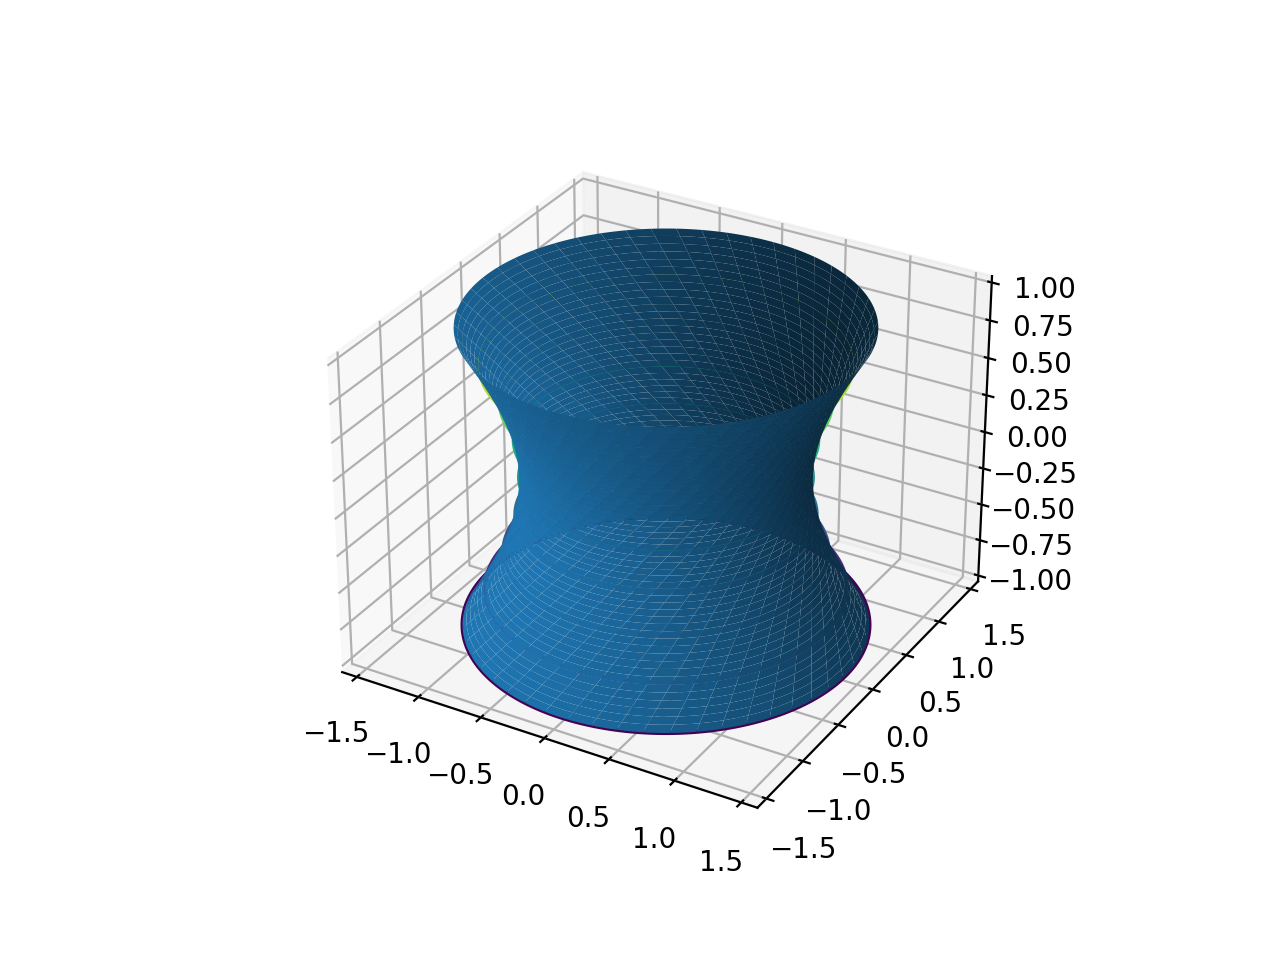

<IPython.core.display.Javascript object>


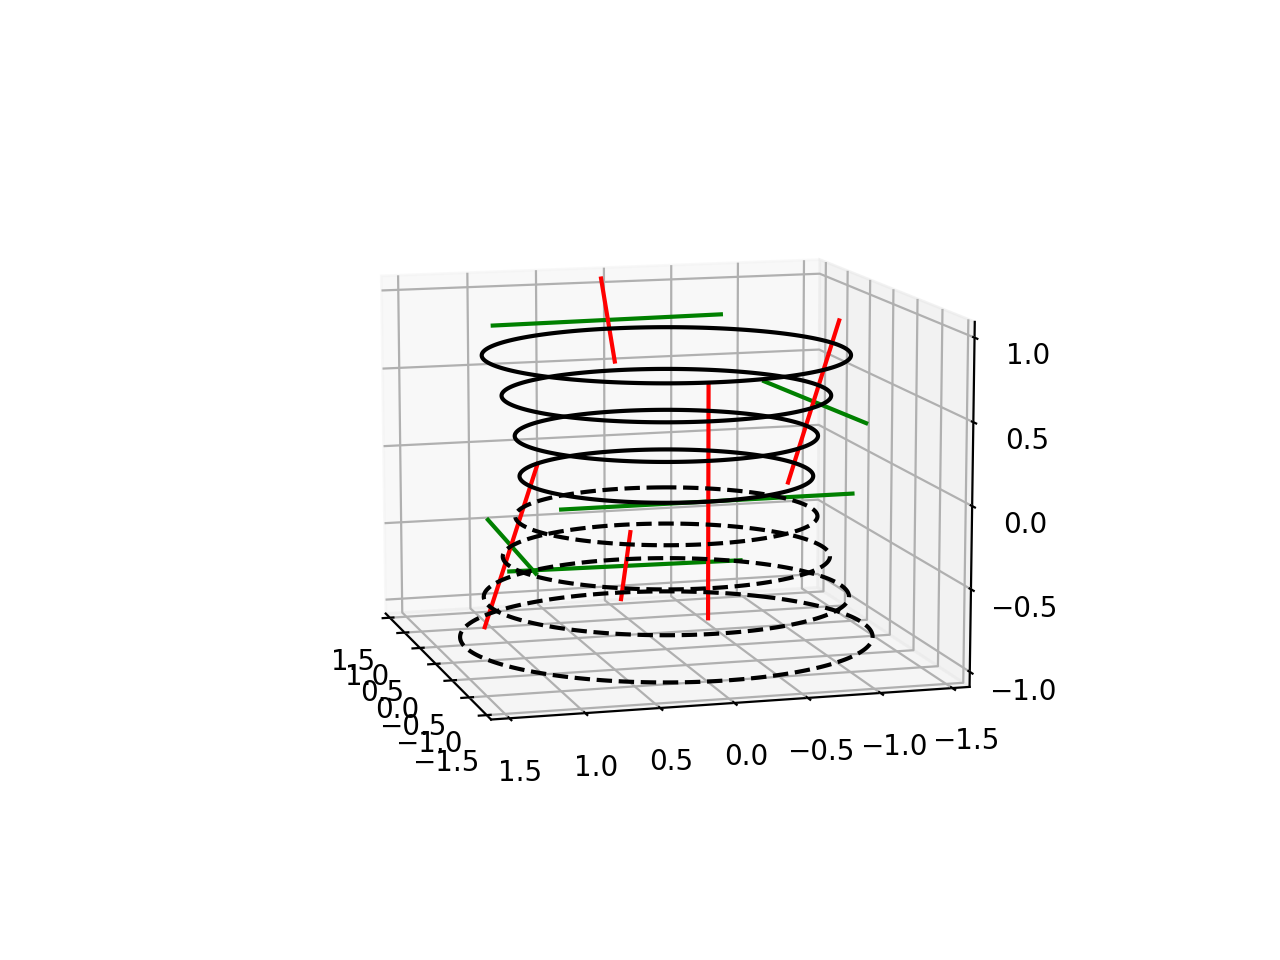

In [10]:
%matplotlib notebook
plot([0, 2*np.pi], [-1,1], f)

## 3) Sphere
Same questions with the sphere

In [11]:
def f(θ, ϕ, R=1):
    return np.array([R*np.cos(θ)*np.sin(ϕ), R*np.sin(θ)*np.sin(ϕ), R*np.cos(ϕ)])

<IPython.core.display.Javascript object>


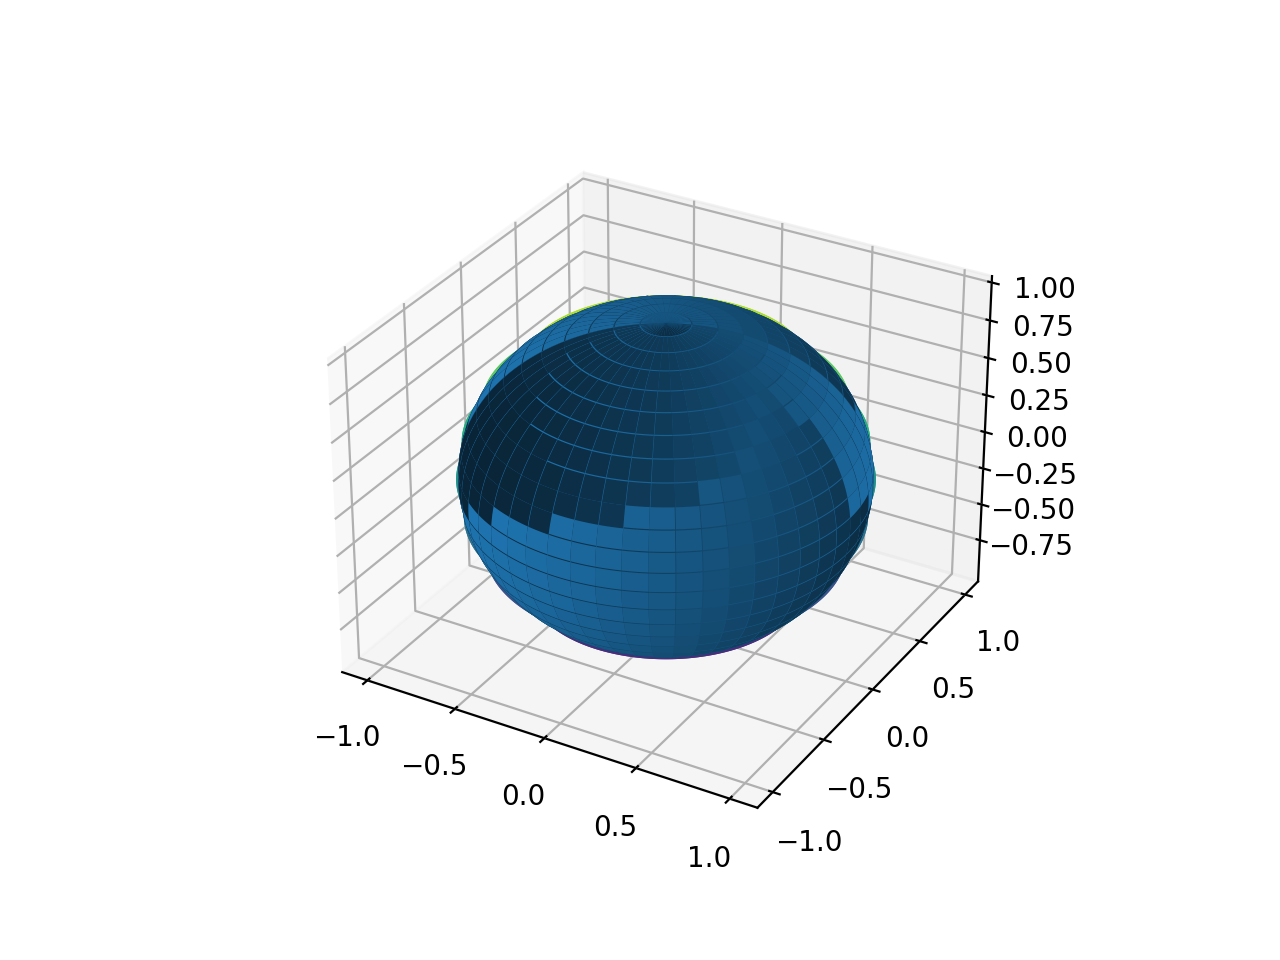

<IPython.core.display.Javascript object>


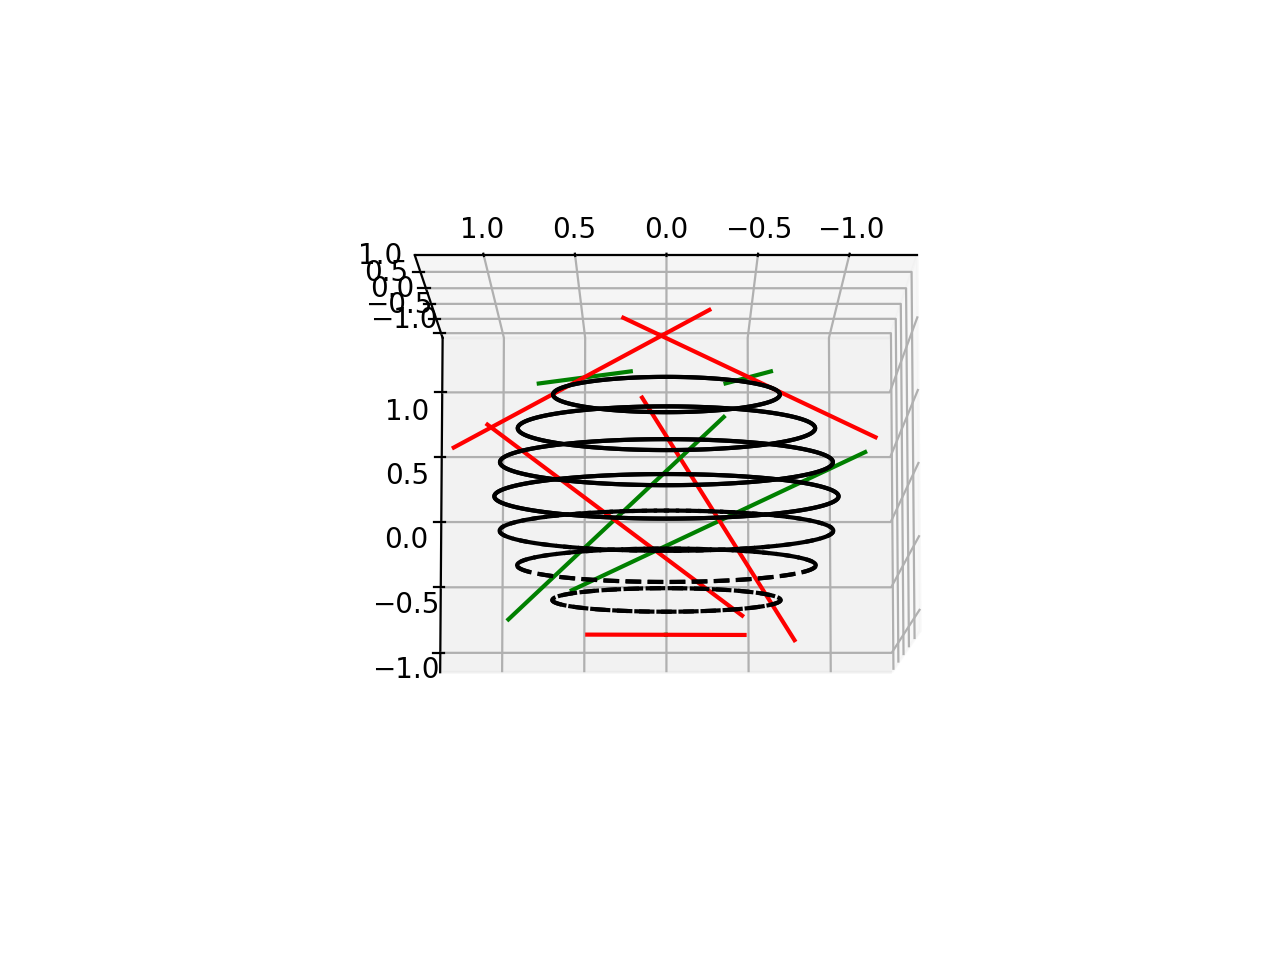

In [12]:
%matplotlib notebook
plot([0, 2*np.pi], [0, 2*np.pi], f)

# 4) Helicoid
We consider the helicoid parametrized by 
$$
f(r,\theta) = (r \cos (\alpha \theta), r \sin (\alpha \theta), \theta)
\quad \mbox{with}\quad  r\in [0,R]\quad \mbox{and}\quad \theta \in [0,2\pi[. 
$$
## - Calculate the mean curvature of the helicoid.


In [13]:
def f(r, θ, α=1.):
    return np.array([r*np.cos(α*θ), r*np.sin(α*θ), θ])

<IPython.core.display.Javascript object>


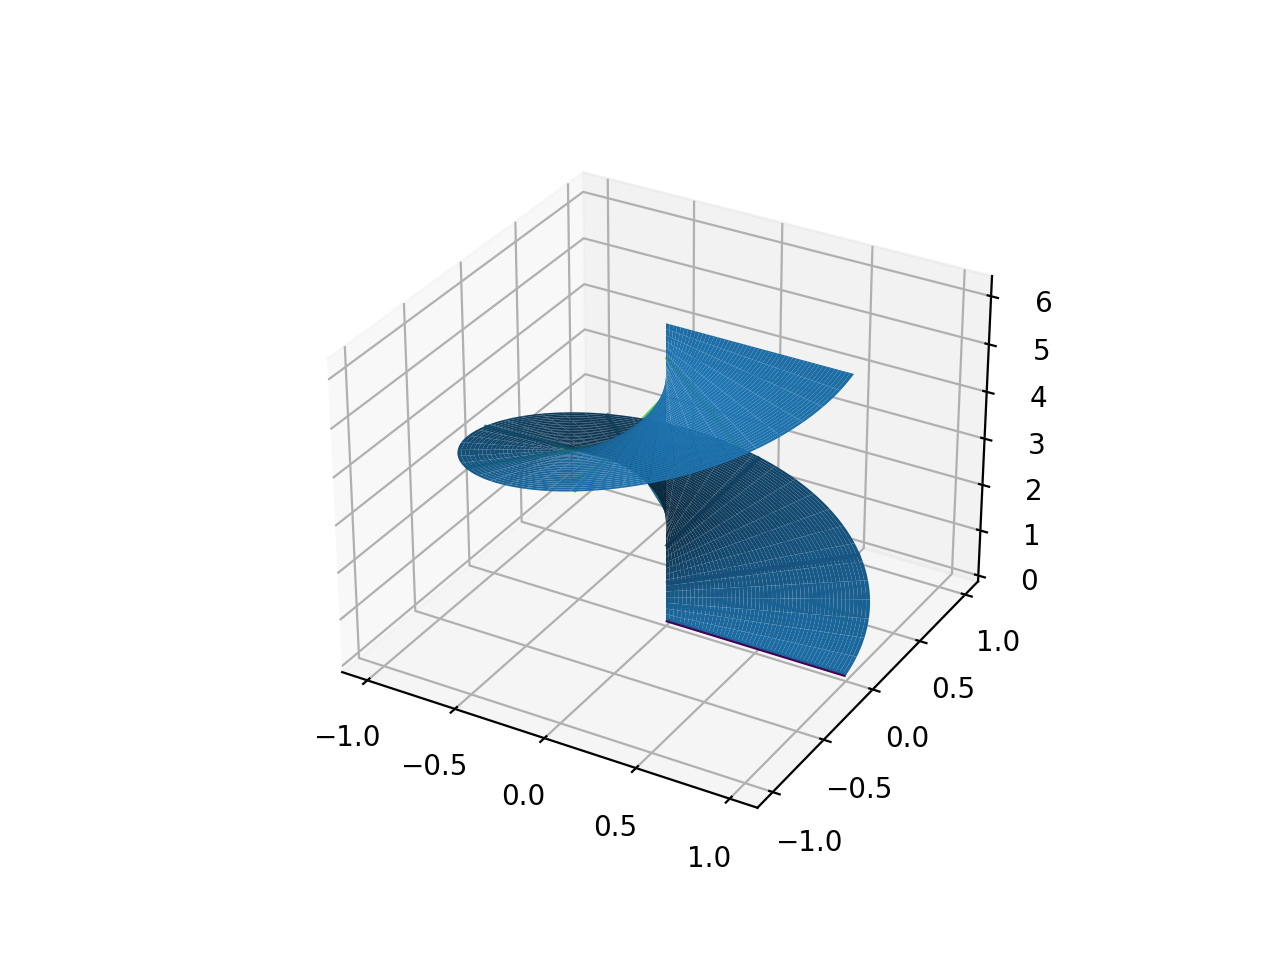

<IPython.core.display.Javascript object>


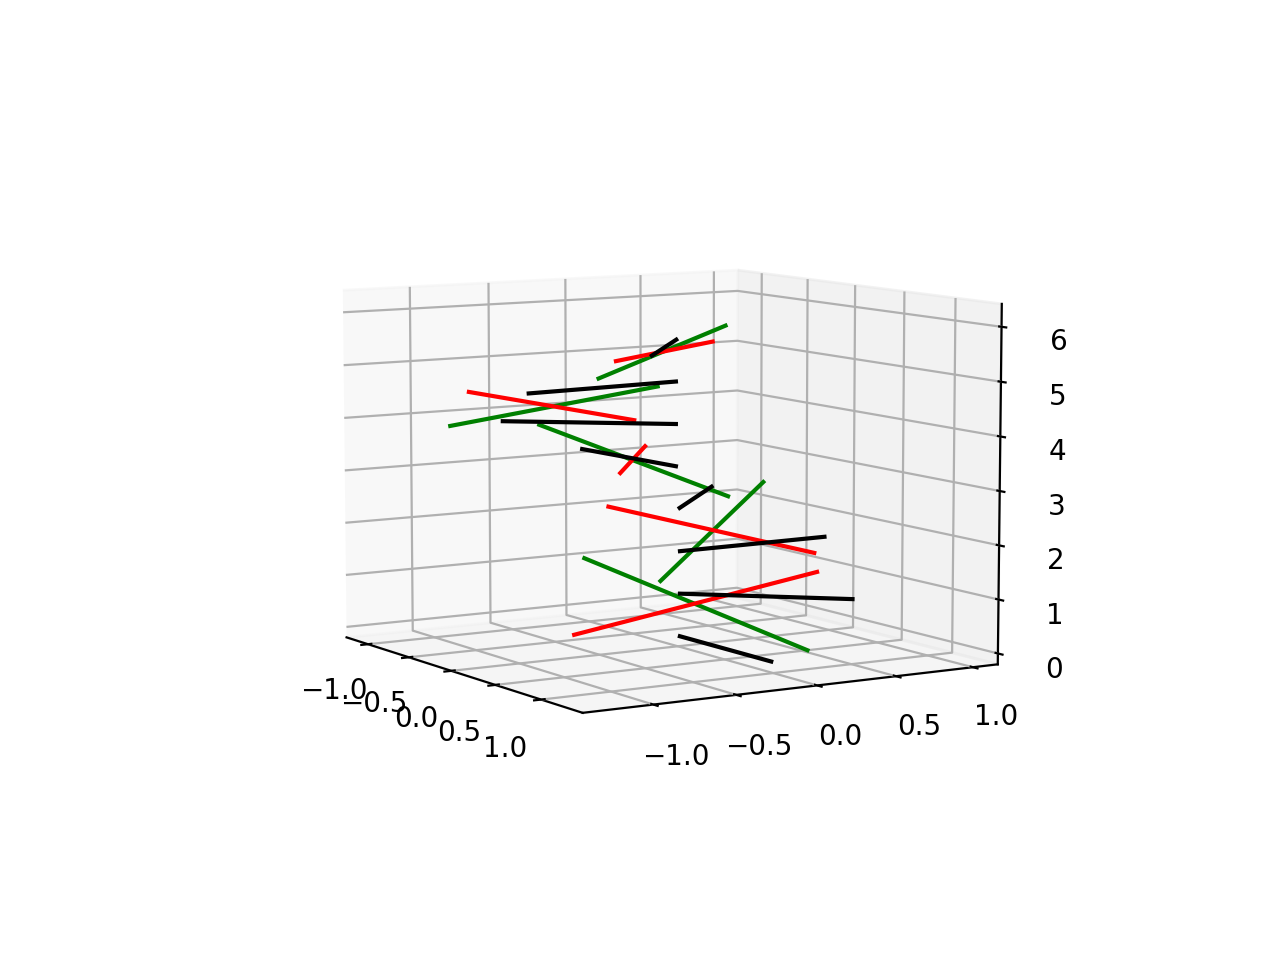

-4.1893397084713513e-13

In [14]:
%matplotlib notebook
plot([0, 1], [0, 2*np.pi], f, get_mean=True)

Mean curvature is 0 when $\alpha$ is 1, $\pi$, 12, so i think it will always be 1